In [1]:
import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)

from synth_dim_model import *

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [90]:
N = 2
M = 4
V = 1

hamiltonian = construct_rescaled_hamiltonian(N, M, V, mu_V_ratio = 0, J_V_ratio = 0)
eigenvalues, eigenvectors = exact_diagonalize(hamiltonian)

In [91]:
ground_state_energy = eigenvalues[0]
ground_state_manifold = []

epsilon = 1e-9

for i in range(M**N):
    if ground_state_energy - epsilon <= eigenvalues[i] <= ground_state_energy + epsilon:
        ground_state_manifold += [eigenvectors[i]]

print(len(ground_state_manifold))

3


In [95]:
projector = np.zeros((M**N, M**N), dtype=complex)
for psi in ground_state_manifold:
    psi = psi.reshape(-1, 1)    
    projector += psi @ psi.T.conj()
    
phi = eigenvectors[0] + eigenvectors[3]
phi = phi/np.linalg.norm(phi)

ground_state_manifold_overlap = phi.T.conj() @ projector @ phi
print(ground_state_manifold_overlap)

(0.49999999999999967+0j)


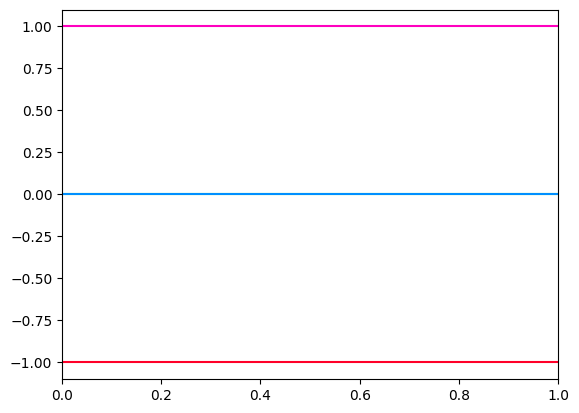

In [68]:
fig, ax = plt.subplots()
colors = get_cmap("gist_rainbow", M**N)

for i in range(M**N):
    ax.axhline(y=eigenvalues[i], color = colors(i))